In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.src.models import Sequential
from keras.src.layers import Dense
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(feature_names)
print(data)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [4]:
X = pd.DataFrame(data, columns=feature_names[:13])
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [5]:
X =X.drop(['CHAS'], axis=1)
print(X)
# print(X.head())

        CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  1.0  273.0     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  1.0  273.0     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  1.0  273.0     21.0   

          B  LSTAT  
0    396.90   4.98  
1    396.90   9.14  


In [6]:
# 입력 변수 정보
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB
None


In [7]:
# 목표변수의 데이터 프레임
y = pd.DataFrame(target)
print(y)

        0
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


In [8]:
# 입출력 데이터 세트의 데이터 프레임
boston_df = X
boston_df['MEDIV'] = target
print(boston_df.head())

      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  MEDIV  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


C:\Users\user\AppData\Local\Temp\ipykernel_18732\72587724.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['MEDIV'], bins=10)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


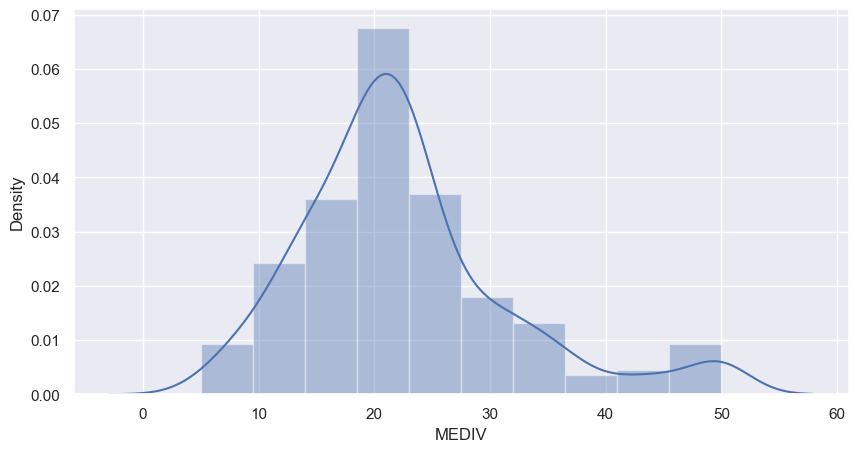

In [9]:
# 목표변수 값의 히스토그램
sns.set(rc={'figure.figsize':(10, 5)})
sns.distplot(boston_df['MEDIV'], bins=10)
plt.show()

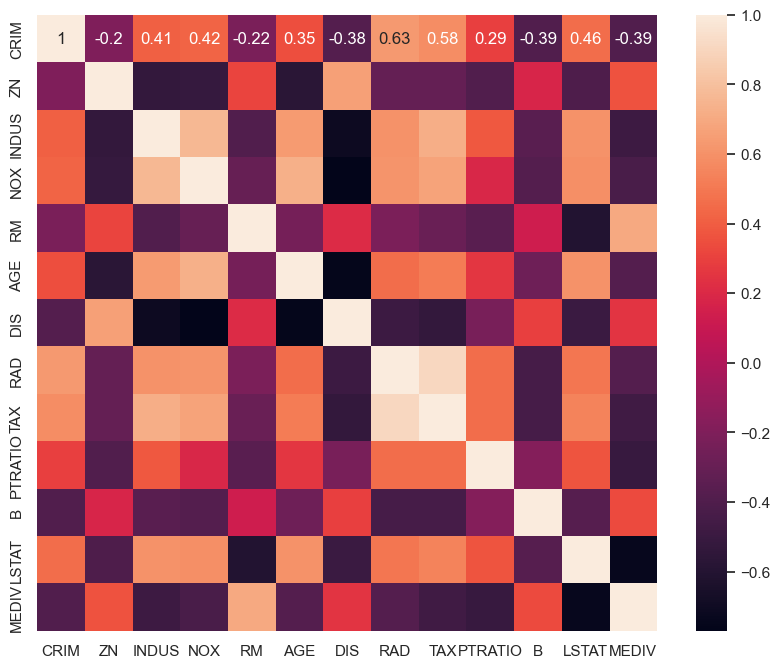

In [10]:
# 각 변수별 상관계수
correlation_matrix = boston_df.corr().round(2)
# 상관계수의 히트맵
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [11]:
# 학습용과 데이터 분리 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# 정규화 스케일러 생성
scalerX = MinMaxScaler()
# 정규화 스케일러를 학습용 데이터에 맞춤
scalerX.fit(X_train)
# 정규화 스케일러로 학습용 데이터를 변환
X_train_norm = scalerX.transform(X_train)
# 정규화 스케이럴로 테스트용 데이터를 변환
X_test_norm = scalerX.transform(X_test)
print(X_train_norm)

[[2.34836411e-03 0.00000000e+00 3.31481481e-01 ... 9.90897171e-01
  4.50212766e-01 4.02222222e-01]
 [6.59206629e-04 3.30000000e-01 5.33333333e-02 ... 9.91073680e-01
  2.04255319e-01 5.20000000e-01]
 [6.51862466e-04 0.00000000e+00 1.22592593e-01 ... 9.96721973e-01
  1.29361702e-01 4.35555556e-01]
 ...
 [2.11748267e-01 0.00000000e+00 6.42962963e-01 ... 9.28992889e-01
  4.65248227e-01 3.13333333e-01]
 [6.65313165e-02 0.00000000e+00 6.42962963e-01 ... 9.46089061e-01
  4.34042553e-02 1.00000000e+00]
 [3.77193491e-02 0.00000000e+00 6.97777778e-01 ... 1.00000000e+00
  7.81843972e-01 1.51111111e-01]]


In [13]:
print(X_test_norm)

[[8.28530387e-04 0.00000000e+00 9.25925926e-02 ... 9.45307378e-01
  1.59148936e-01 3.91111111e-01]
 [7.78595519e-02 0.00000000e+00 6.42962963e-01 ... 9.95915074e-01
  1.49787234e-01 4.44444444e-01]
 [5.34219855e-04 0.00000000e+00 4.87037037e-01 ... 9.89661607e-01
  3.34184397e-01 4.06666667e-01]
 ...
 [2.21276911e-03 0.00000000e+00 9.22592593e-01 ... 9.70043875e-01
  3.71063830e-01 3.64444444e-01]
 [3.77544378e-03 0.00000000e+00 2.45925926e-01 ... 9.85450603e-01
  2.83971631e-01 3.00000000e-01]
 [8.69059286e-04 0.00000000e+00 1.22592593e-01 ... 9.90745877e-01
  2.37730496e-01 4.04444444e-01]]


In [14]:
# 정규화 스케일러 생성
scalerY = MinMaxScaler()
# 정규화 스케일러르 학습용 데이터에 맞춤
scalerY.fit(y_train)
# 정규화 스케일러로 학습용 데이터를 변환
y_train_norm = scalerY.transform(y_train)
# 정규화 스케이럴로 테스트용 데이터를 변환
y_test_norm = scalerY.transform(y_test)
print(y_train_norm[0:10])

[[0.40222222]
 [0.52      ]
 [0.43555556]
 [0.43333333]
 [0.19111111]
 [0.36      ]
 [0.47555556]
 [0.41777778]
 [0.38888889]
 [0.37777778]]


In [15]:
print(y_test_norm[0:10])

[[0.39111111]
 [0.44444444]
 [0.40666667]
 [0.18666667]
 [0.22444444]
 [0.33111111]
 [0.23555556]
 [0.35555556]
 [0.12      ]
 [0.37111111]]


In [16]:
# 모형 구조
model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(12,)))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 모형 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 60)                  │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           3,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 모형 구성
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mse'])

In [19]:
# 학습
results = model.fit(X_train_norm, y_train_norm,
                   validation_data=(X_test_norm, y_train_norm),
                   epochs=200, batch_size=32)

Epoch 1/200


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (None, 13)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 13), dtype=float32)
  • training=True
  • mask=None

In [24]:
# 학습모형에 저장된 키(변수)
print(results.history.keys())

NameError: name 'results' is not defined

In [ ]:
# 학습 수에 따른 loss 변화
plt.figure(figsize=(10, 5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# 학습 수에 따른 정확도(mae) 변화
plt.figure(figsize=(10, 5))
plt.plot(results.history['mae'])
plt.plot(results.history['val_mae'])
plt.title('accuracy(MAE)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_min).flatten()
# 예측 값의 역변환
y_pred_inverse = scalerY.inverse_transfrom(y_pred.reshape(-1, 1))
print(y_pred_inverse[0:10])

In [ ]:
# 오차 측정(MAE)
print('MAE: %.2f' %mean_absolute_error(y_test, y_pred_inverse))

In [ ]:
# 실제 값 대비 예측 값의 산포도
plt.figure(figsize=(7, 7))
plt.scatter(y_test_norm, y_pred, c='r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equls')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1],[0,1])
plt.show()